In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
DATADIR = "/Users/nirajparikh/Desktop/Jeet ML/78313_182633_bundle_archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

In [4]:
CATEGORIES = [i for i in os.listdir(DATADIR)]

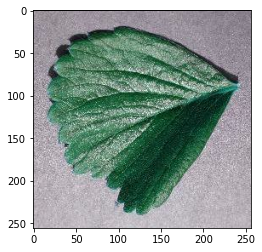

In [5]:
for category in os.listdir(DATADIR):
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
        

In [6]:
len(img_array)

256

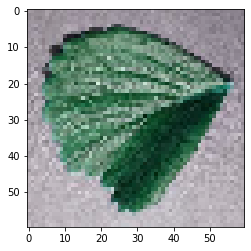

In [7]:
IMG_SIZE = 60
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [8]:
training_data = []

def create_training_data():
    for category in os.listdir(DATADIR):
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [9]:
len(training_data)

70295

In [10]:
import random
random.shuffle(training_data)

In [11]:
X = []
y = []

In [12]:
for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)


In [13]:
# import pickle

# pickle_out = open("X.pickle","wb")
# pickle.dump(X,pickle_out)
# pickle_out.close()

# pickle_out = open("y.pickle","wb")
# pickle.dump(y,pickle_out)
# pickle_out.close()

### To Load Back Data
<code> 
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)
<code>

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras
X = X/255.0

from tensorflow.keras.utils import to_categorical
x_binary = to_categorical(X)

model = tf.keras.Sequential([
# model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Flatten())
# model.add(Dense(64))

# model.add(Dense(1))
# model.add(Activation("sigmoid"))

Conv2D(64, (3,3), input_shape = X.shape[1:]),
Activation("relu"),
MaxPooling2D(pool_size = (2,2)),

Conv2D(64, (3,3)),
Activation("relu"),
MaxPooling2D(pool_size = (2,2)),

Conv2D(64, (3,3)),
Activation("relu"),
MaxPooling2D(pool_size = (2,2)),

Flatten(),
Dense(64),

Dense(1),
Activation("sigmoid")
    
])
  
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

model.fit(X,y,batch_size=100, validation_split=0.1)


Train on 63265 samples, validate on 7030 samples


In [ ]:
X.shape

In [ ]:
from tensorflow.keras.utils import to_categorical
x_binary = to_categorical(X)